# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
#pip install tensorflow-gpu

In [0]:
tf.random.set_seed(42)

In [0]:
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [7]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [24]:
x = np.unique(y_train)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
print("No. of sample in x_train: ", x_train.shape[0])
print("No. of sample in x_test: ",x_test.shape[0])

No. of sample in x_train:  50000
No. of sample in x_test:  10000


Dimensions of an Image:  (32, 32)


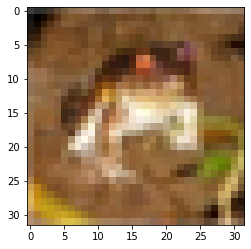

In [11]:
print("Dimensions of an Image: ",x_train.shape[1:3])
plt.figure()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.grid(False)
plt.show()

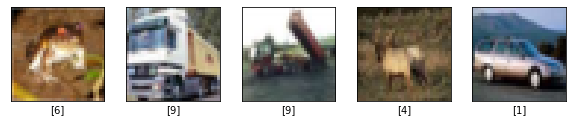

In [12]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [30]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
print('Normalization Done')

Normalization Done


In [0]:
y_train_OH = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_OH = tf.keras.utils.to_categorical(y_test, num_classes=10)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dropout

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()
model = Sequential()
model.add(BatchNormalization(input_shape=(32,32,3,)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

#Output layer
model.add(Dense(10, activation='softmax'))

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('model.h5',save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [53]:
#Train the model
model.fit(x_train_norm, y_train_OH, validation_data=(x_test_norm,y_test_OH), epochs=10, batch_size=32, callbacks=[model_checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.2823 - accuracy: 0.5457
Epoch 00001: val_accuracy improved from -inf to 0.64750, saving model to model.h5
50000/50000 [==============================] - 16s 324us/sample - loss: 1.2824 - accuracy: 0.5457 - val_loss: 0.9959 - val_accuracy: 0.6475
Epoch 2/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.9431 - accuracy: 0.6724
Epoch 00002: val_accuracy improved from 0.64750 to 0.67790, saving model to model.h5
50000/50000 [==============================] - 15s 308us/sample - loss: 0.9428 - accuracy: 0.6725 - val_loss: 0.9058 - val_accuracy: 0.6779
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.7773 - accuracy: 0.7306
Epoch 00003: val_accuracy improved from 0.67790 to 0.71620, saving model to model.h5
50000/50000 [==============================] - 15s 307us/sample - loss: 0.7773 - accuracy: 0.7306 - val_loss: 0.8143 -

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [0]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [69]:
# Python3 program to change the 
# directory of file using os.chdir() method 

# import os library 
import os 

# change the current directory 
# to specified directory 
os.chdir(r"/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8") 

print("Directory changed") 
!ls

Directory changed
images.zip
R8_External_Lab_Ques_CIFAR10_Transfer_Learning_TFIDF_Text_Classification.ipynb
R8_Internal_Lab_ACV_NLP_Question.ipynb
tweets.csv


In [71]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8/images.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
print("Unzipped Successfully")   

Unzipped Successfully


In [0]:
image1 = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8/images/49436743043_2441587ab9_c.jpg')
image1 = image1.resize((500,500))
image2 = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8/images/49438170746_8378201627_c.jpg')
image2 = image2.resize((500,500))
image3 = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8/images/49441887332_107afa786d_c.jpg')
image3 = image3.resize((500,500))
image4 = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8/images/4994221690_d070e8a355_c.jpg')
image4 = image4.resize((500,500))

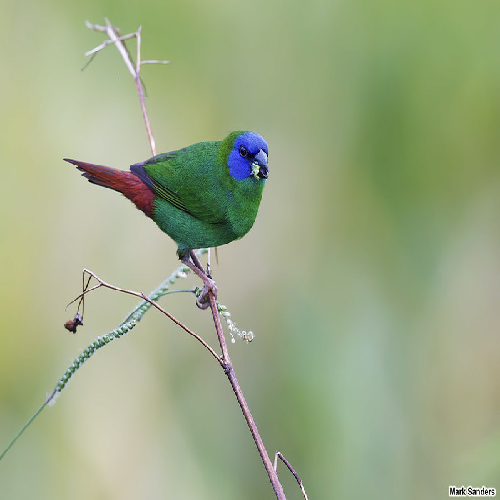

In [83]:
image1

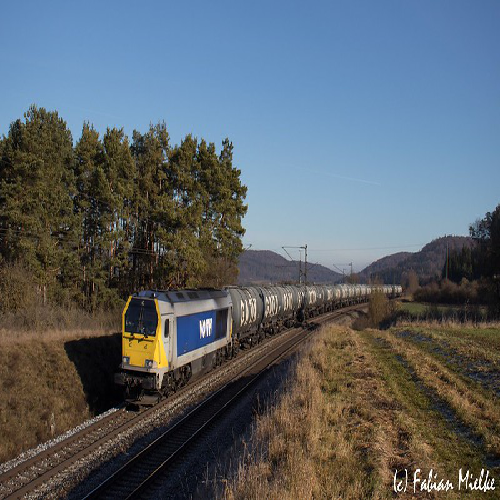

In [84]:
image2

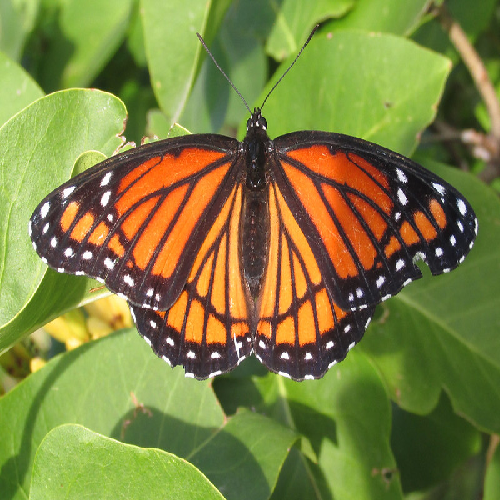

In [85]:
image3

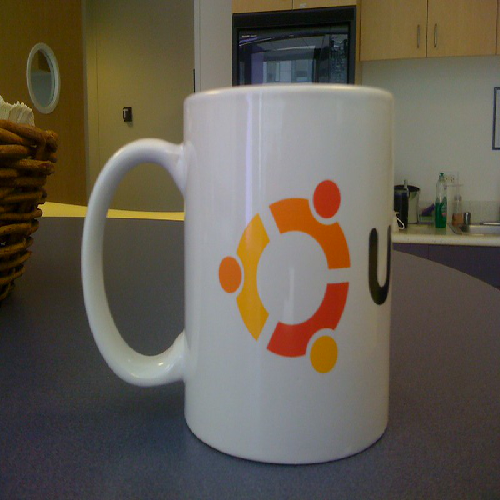

In [86]:
image4

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [0]:
#Prepare Input 
#VGG takes 224x224 image
model_input = image1.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

In [88]:
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [90]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

553467904/553467096 [==============================] - 13s 0us/step


In [91]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [92]:
#Predict
prediction = vgg.predict(model_input)
prediction.shape

(1, 1000)

In [93]:
#Prediction Class
np.argmax(prediction[0])

92

In [0]:
label=decode_predictions(prediction)

In [97]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

bee_eater (33.14%)


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
tweeets_data = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 8/tweets.csv',encoding='latin')

In [103]:
tweeets_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [104]:
tweeets_data.shape

(9093, 3)

**Drop null values**

*   Drop all the rows with null values




In [0]:
tweets_data = tweeets_data.dropna()

In [108]:
tweets_data.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [109]:
tweets_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
from pandas import Series,DataFrame
import re

In [0]:
tweets_data['tweet_text'] = tweets_data['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
tweets_data['tweet_text'] = tweets_data['tweet_text'].apply(lambda s: s.lower())

In [0]:
tweets_data['tweet_text'] = tweets_data['tweet_text'].apply(lambda s: s.strip())

In [120]:
tweets_data.sample(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5442,mention pple on ongress ice mention pple set ...,Apple,Positive emotion
2464,ust found out new mapquest ihone app has turnb...,iPad or iPhone App,Positive emotion
1765,# 2011 rendsut ooglen witterext ngry irds,Google,Positive emotion


## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [121]:
tweets_data.is_there_an_emotion_directed_at_a_brand_or_product.unique() 

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [127]:
tweets_data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts() 

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
tweets_fdata = tweets_data.loc[tweets_data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Negative emotion', 'Positive emotion'])]

In [130]:
tweets_fdata.shape

(3191, 3)

In [131]:
tweets_fdata.is_there_an_emotion_directed_at_a_brand_or_product.value_counts() 

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
tweets_fdata['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_fdata['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion': 1, 'Negative emotion': 0})

In [133]:
tweets_fdata.is_there_an_emotion_directed_at_a_brand_or_product.value_counts() 

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = tweets_fdata['tweet_text']
y = tweets_fdata['is_there_an_emotion_directed_at_a_brand_or_product']

In [139]:
X.shape

(3191,)

In [140]:
y.shape

(3191,)

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state = 1)

In [144]:
X_train.shape

(2393,)

In [145]:
X_test.shape

(798,)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)

### Fit the classifer
- fit logistic regression classifier

In [149]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# use Naive Bayes
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [153]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class_logreg = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class_nb = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [158]:
print(metrics.accuracy_score(y_test, y_pred_class_logreg))

0.8395989974937343


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [159]:
# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class_nb))

0.8583959899749374
